In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import pickle


In [3]:
with open("trainX.pickle","rb") as f:
    X = pickle.load(f)
    
with open("trainY.pickle","rb") as f:
    Y = pickle.load(f)

with open("testX.pickle","rb") as f:
    testX = pickle.load(f) 

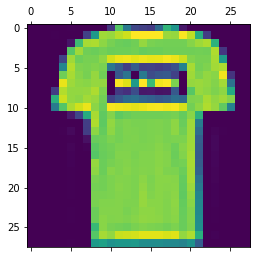

In [4]:
plt.matshow(X[1])

In [78]:
X[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

In [79]:
Y[100]

8

In [7]:
testX.shape

(10000, 28, 28)

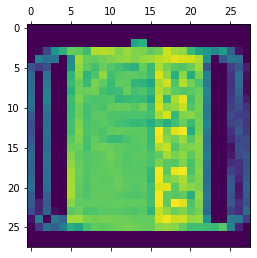

In [8]:
plt.matshow(testX[2091])

In [9]:
print(X.shape)
print(Y.shape)
print(testX.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [10]:
#Splitting the training dataset into training, validation and testing dataset in 8:1:1 split
X_train = X[:48000]
X_val = X[48000:54000]
X_test = X[54000:]

Y_train = Y[:48000]
Y_val = Y[48000:54000]
Y_test = Y[54000:]

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28)
(6000, 28, 28)
(6000, 28, 28)


In [12]:
batch_size  = 128
num_classes = 10
epochs = 10

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255 #will either generate 1 or 0 only
X_val /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0],'train samples')
print(X_val.shape[0],'validation samples')
print(X_test.shape[0],'test samples')

# convert class vectors to binary matrix
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_val = keras.utils.to_categorical(Y_val,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

X_train shape: (48000, 28, 28)
48000 train samples
6000 validation samples
6000 test samples


In [14]:
X_train = np.reshape(X_train,(48000,28,28,1))
X_val = np.reshape(X_val,(6000,28,28,1))
X_test = np.reshape(X_test,(6000,28,28,1))

In [15]:
X_train.shape

(48000, 28, 28, 1)

## Building a Convolutional Neural Network for Training Model

In [16]:
model = Sequential()

model.add(Conv2D(kernel_size=3 , filters=64, input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=3, filters=32, activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=4, filters=16, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(50, activation='relu')) # Hidden layer 1

model.add(Dense(30, activation='relu')) # Hidden layer 2

model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0623 10:35:14.936325  4104 deprecation_wrapper.py:119] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 10:35:14.968314  4104 deprecation_wrapper.py:119] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 10:35:14.976315  4104 deprecation_wrapper.py:119] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 10:35:15.000308  4104 deprecation_wrapper.py:119] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          8208      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [17]:
# model = Sequential()
# model.add(Dense(1000, input_dim = 784))
# model.add(Activation('relu'))
# model.add(Dense(250))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.summary()
# model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer = 'adam',
#              metrics= ['accuracy'])

In [18]:
model.fit(X_train,Y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (X_val,Y_val))

W0623 10:35:15.372214  4104 deprecation.py:323] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 10:35:15.760131  4104 deprecation_wrapper.py:119] From c:\users\sanch\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 6000 samples
Epoch 1/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.7566 - acc: 0.7149 - val_loss: 0.5258 - val_acc: 0.7990
Epoch 2/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.4069 - acc: 0.8509 - val_loss: 0.3825 - val_acc: 0.8645
Epoch 3/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.3437 - acc: 0.8750 - val_loss: 0.3559 - val_acc: 0.8727
Epoch 4/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3119 - acc: 0.8871 - val_loss: 0.3089 - val_acc: 0.8917
Epoch 5/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2883 - acc: 0.8942 - val_loss: 0.3091 - val_acc: 0.8878
Epoch 6/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2708 - acc: 0.9016 - val_loss: 0.2860 - val_acc: 0.8933
Epoch 7/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2569 - acc: 0.9055 - val_loss: 0.2733 - val_acc:

In [19]:
score = model.evaluate(X_test,Y_test,verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.25650462694962817
Test accuracy:  0.9058333333333334


### Predicting values for the TEST data

In [26]:
predictions = model.predict_classes([testX])
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [27]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Testing the accuracy of predicted values!


Item image at 500th index


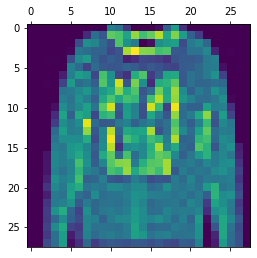

Predicted:  2

Item image at 501th index


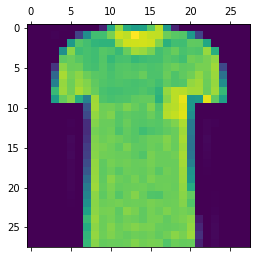

Predicted:  0

Item image at 502th index


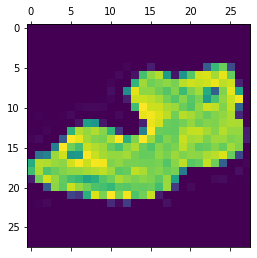

Predicted:  5

Item image at 503th index


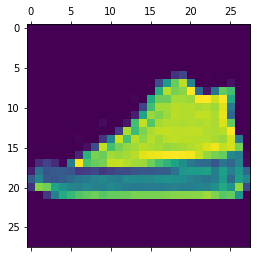

Predicted:  7

Item image at 504th index


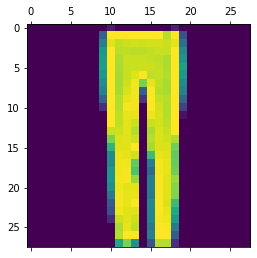

Predicted:  1

Item image at 505th index


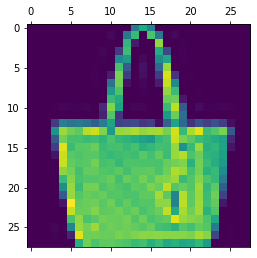

Predicted:  8

Item image at 506th index


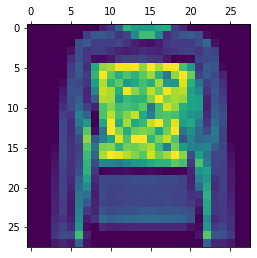

Predicted:  2


In [77]:
for i in range(7):
    print("\nItem image at {}th index".format(i+500))
    plt.matshow(testX[i+500].reshape(28,28))
    plt.show()
    print("Predicted: ",predictions[i+500])
   

### Writing the data in predictions.pickle

In [57]:
with open('predictions.pickle', 'wb') as output_file:
    pickle.dump(predictions, output_file)